# Pure Python Implementation 


In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
def Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter):

   def check_succ(c, lim, max_iter):
   # Fuction control the divergence of succession
   # Note  :  if succession remains in lim the sequence converges
       z = c
       i = 0
       while (i < max_iter) and (math.sqrt((z.real)**2 + (z.imag)**2)< lim) :  
           z = z**2 + c
           i += 1  #  Note:  not all points diverge at the same time
       return i    #  Keep track of the number of iterations 


   def set_plot(n, lim,  max_iter, xi,xs,yi,ys):   

       image = [[0 for col in range(n)] 
                   for row in range(n)]                  # initialize matrix n x n

       step_XS = (xs - xi) / (n - 1)
       X_S  = [xi + step_XS * i for i in range(n)]       # range real axis from xi to xs

       step_YS = (ys - yi) / (n - 1)
       Y_S  = [yi + step_YS * i for i in range(n)]       # range complex axis  from yi to ys

       for x in range(n):
           for y in range(n):
               image[y][x] = check_succ(complex(X_S[x],Y_S[y]),lim, max_iter)
       return image

   mandelbrot = set_plot(n,lim,max_iter, xi,xs,yi,ys)
   return mandelbrot

In [ ]:
#Parameters
n = 500                           # number of point 
xi,xs,yi,ys = -2.5,1,-1.5,1.5
#xi,xs,yi,ys = -2,-1,-0.5,0.5     # parameter for zoom
lim = 3                           # convergence limit
max_iter = 30                     # NOTE :  if too big the calculation will be long

mandelbrot = Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter)

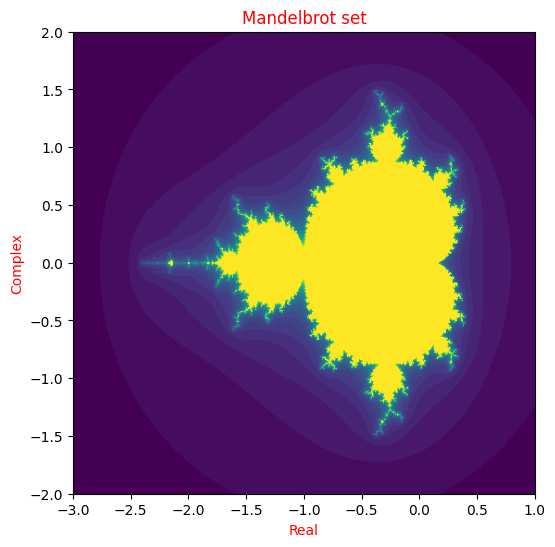

In [ ]:
#Plot
#
plt.figure(1,figsize=[6,6])
plt.title('Mandelbrot set',color = "red")
plt.imshow(mandelbrot,extent=[-3,1,-2,2])
plt.xlabel('Real',color = "red")
plt.ylabel('Complex',color = "red")
plt.show()

# Numpy Vectorization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter):

   def set_NV(n, lim,  max_iter, xi,xs,yi,ys):   
       # Note
       # Because of the NumPy's vectorization, the matrix can be passed as one element, c, 
       # and then perform calculations for each element without writing explicit loops

       image = np.full((n,n),0)                           # matrix n x n
       X_S = np.linspace(xi,xs,n).reshape((1, n))         # range real axis from xi to xs
       Y_S = np.linspace(yi,ys,n).reshape((n, 1))         # range comple axis 

       c_m = X_S + 1j * Y_S                               # matrix of complex numbers

       z = np.zeros(c_m.shape, dtype=np.complex128)

       image = np.zeros(z.shape, dtype=int)            

       m = np.full(c_m.shape, True, dtype=bool)

       for i in range(max_iter):
           z[m] = z[m]**2 + c_m[m]
           mask_diver = np.greater(np.abs(z), lim, out=np.full(c_m.shape, False), where=m) # For find diverging
           image[mask_diver] = i         
           m[np.abs(z) > lim] = False    # to store which have diverged

       return image
   
   mandelbrot = set_NV(n,lim,max_iter,xi,xs,yi,ys)
   return mandelbrot

In [ ]:
#Parameters
n = 500                           # number of point 
xi,xs,yi,ys = -2.5,1,-1.5,1.5
#xi,xs,yi,ys = -2,-1,-0.5,0.5     # parameter for zoom
lim = 3                           # convergence limit
max_iter = 30                     # NOTE :  if too big the calculation will be long

mandelbrot = Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter)

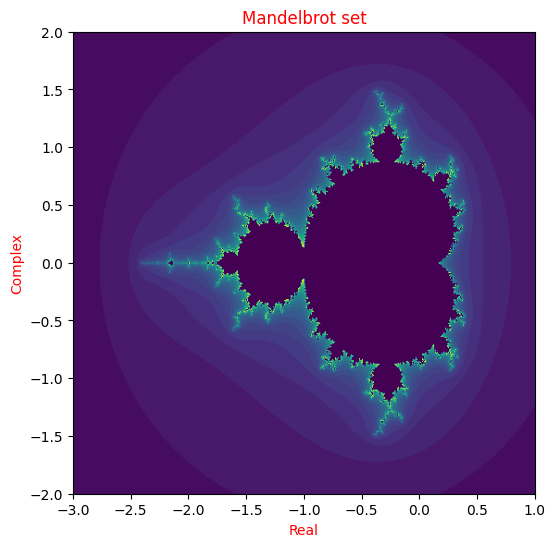

In [ ]:
#Plot
#
plt.figure(1,figsize=[6,6])
plt.title('Mandelbrot set',color = "red")
plt.imshow(mandelbrot,extent=[-3,1,-2,2])
plt.xlabel('Real',color = "red")
plt.ylabel('Complex',color = "red")
plt.show()

#  Evaluate and compare the performance of the two approaches

It is clear from tests below that Numpy vectorization is faster than pure Python implementation (based on iteration).

Especially increasing the number of points.







## Test 1  -- Base

In [ ]:
#Parameters
n = 500                          
xi,xs,yi,ys = -2.5,1,-1.5,1.5
lim = 3                          
max_iter = 30  

In [ ]:
%timeit Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter)

1.1 s ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter)

229 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Test 2  -- Points increase

In [ ]:
#Parameters
n = 3000                          
xi,xs,yi,ys = -2.5,1,-1.5,1.5
lim = 3                          
max_iter = 30 

In [ ]:
%timeit Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter)

44.3 s ± 546 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter)

10.1 s ± 322 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Test 3 -- Iteration increase

In [ ]:
#Parameters
n = 500                          
xi,xs,yi,ys = -2.5,1,-1.5,1.5
lim = 3                          
max_iter = 1000  

In [ ]:
%timeit Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter)

20.6 s ± 658 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter)

7.9 s ± 501 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Test 4 -- Iteration + Point increase

In [ ]:
#Parameters
n = 2000                          
xi,xs,yi,ys = -2.5,1,-1.5,1.5
lim = 3                          
max_iter = 500 

In [ ]:
%timeit Mandelbrot_PPI(xi,xs,yi,ys,n,lim, max_iter)

2min 50s ± 1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit Mandelbrot_NV(xi,xs,yi,ys,n,lim, max_iter)

59.6 s ± 606 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
